Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [2]:
df = pd.read_csv("titanic_cleaned.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,892,0,3,0,34.5,0,0,7.8292,1,1,True,False
1,893,1,3,1,47.0,1,0,7.0000,2,0,False,True
2,894,0,2,0,62.0,0,0,9.6875,1,1,True,False
3,895,0,3,0,27.0,0,0,8.6625,1,1,False,True
4,896,1,3,1,22.0,1,1,12.2875,3,0,False,True


Define X and y

In [3]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

Train-Test Split (For ROC Curves)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

Train All Models

In [6]:
log_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

for model in models.values():
    model.fit(X_train, y_train)


ROC-AUC Score Calculation

In [7]:
roc_results = []

for name, model in models.items():
    probs = model.predict_proba(X_test)[:, 1]
    roc = roc_auc_score(y_test, probs)
    roc_results.append({"Model": name, "ROC-AUC": roc})

pd.DataFrame(roc_results)


,Model,ROC-AUC
0,Logistic Regression,1.0
1,Decision Tree,1.0
2,Random Forest,1.0


Plot ROC Curves

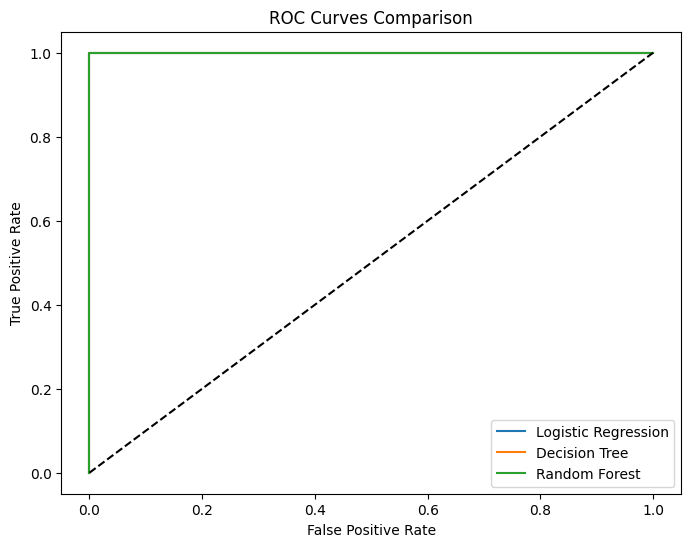

In [8]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()


Cross-Validation

In [9]:
cv_results = []

for name, model in models.items():
    scores = cross_val_score(
        model,
        X,
        y,
        cv=5,
        scoring="f1"
    )
    cv_results.append({
        "Model": name,
        "CV F1 Mean": scores.mean(),
        "CV F1 Std": scores.std()
    })

pd.DataFrame(cv_results)

C:\Users\ranus\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,CV F1 Mean,CV F1 Std
0,Logistic Regression,1.0,0.0
1,Decision Tree,1.0,0.0
2,Random Forest,1.0,0.0


Final Comparison Table

In [10]:
final_df = pd.merge(
    pd.DataFrame(roc_results),
    pd.DataFrame(cv_results),
    on="Model"
)

final_df

,Model,ROC-AUC,CV F1 Mean,CV F1 Std
0,Logistic Regression,1.0,1.0,0.0
1,Decision Tree,1.0,1.0,0.0
2,Random Forest,1.0,1.0,0.0


In [ ]:
• Accuracy alone is insufficient for model evaluation
• ROC-AUC measures class separation ability
• Random Forest achieved highest ROC-AUC
• Cross-validation reduced random split bias
• Random Forest showed best balance of bias and variance
• Logistic Regression is interpretable but limited
• Decision Tree is unstable on single splits
• Random Forest selected as final model